In [46]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [47]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [48]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')
type(PLAID_CLIENT_ID)

str

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [49]:
INSTITUTION_ID = "ins_109508"

In [50]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
client.Institutions.get(2)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': False,
   'input_spec': 'fixed',
   'institution_id': 'ins_25',
   'mfa': [],
   'mfa_code_type': 'numeric',
   'name': 'Ally Bank',
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': ['124003116']},
  {'country_codes': ['US'],
   'credentials': [{'label': 'Login ID', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_113968',
   'mfa': ['questions'],
   'mfa_code_type': 'numeric',
   'name': 'Amegy Bank of Texas - Personal Banking',
   'products': ['assets', 'auth', 'balance', 'transactions', 'income'],
   'routing_numbers': ['113011258']}],
 'request_id': 'jDlbxoOuftrtTPL',
 'total': 10

### 2. Generate a public token

In [51]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [52]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [53]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'D6l6PlqRZ1FejwJ6apPohwReVBADa1IvwbLVA',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'V6M6bML1RaFebm8RN4n3hmvkLbZ8wzuWmzZx3',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'ww4wW4lAnbs1KXAr6dQnI5AbZ6r3GyfrNJ1kn',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [54]:
# YOUR CODE HERE
# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)
transaction_response.keys()
transaction_selected=transaction_response['transactions']

# Print JSON output
print(json.dumps(transaction_selected[:2],indent=4, sort_keys=True))


[
    {
        "account_id": "D6l6PlqRZ1FejwJ6apPohwReVBADa1IvwbLVA",
        "account_owner": null,
        "amount": 6.33,
        "category": [
            "Travel",
            "Car Service",
            "Ride Share"
        ],
        "category_id": "22006001",
        "date": "2019-10-01",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Uber 072515 SF**POOL**",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transaction_id": null,
     

### 2. Print the categories for each transaction

In [55]:
# YOUR CODE HERE
number_transaction=len(transaction_selected)
for i in range(0, number_transaction):
    print(transaction_selected[i]['category'])


['Travel', 'Car Service', 'Ride Share']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Car Service', 'Ride Share']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Car Service', 'Ride Share']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Car Service', 'Ride Share']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [56]:
# YOUR CODE HERE
selected_df = pd.DataFrame(columns=['date', 'name', 'amount', 'category'])
for i in range(0,number_transaction):
    
    temp_date=transaction_selected[i]['date']
    temp_name=transaction_selected[i]['name']
    temp_amount=transaction_selected[i]['amount']
    temp_category=transaction_selected[i]['category']
    temp=[temp_date, temp_name, temp_amount,temp_category[0]]
    selected_df = selected_df.append(pd.Series(temp, index=selected_df.columns ), ignore_index=True)

print(selected_df)

          date                                   name   amount        category
0   2019-10-01                 Uber 072515 SF**POOL**     6.33          Travel
1   2019-09-28                             Tectra Inc   500.00  Food and Drink
2   2019-09-27              AUTOMATIC PAYMENT - THANK  2078.50         Payment
3   2019-09-27                                    KFC   500.00  Food and Drink
4   2019-09-27                   Madison Bicycle Shop   500.00           Shops
5   2019-09-18           CREDIT CARD 3333 PAYMENT *//    25.00         Payment
6   2019-09-18                 Uber 063015 SF**POOL**     5.40          Travel
7   2019-09-17  ACH Electronic CreditGUSTO PAY 123456  5850.00        Transfer
8   2019-09-17                   CD DEPOSIT .INITIAL.  1000.00        Transfer
9   2019-09-16                    Touchstone Climbing    78.50      Recreation
10  2019-09-16                        United Airlines  -500.00          Travel
11  2019-09-15                             McDonald'

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [57]:
# YOUR CODE HERE
selected_df['date'] = pd.to_datetime(selected_df['date'])
type(selected_df['date'][0])
type(selected_df['amount'][0])
selected_df.head()


,date,name,amount,category
0,2019-10-01,Uber 072515 SF**POOL**,6.33,Travel
1,2019-09-28,Tectra Inc,500.00,Food and Drink
2,2019-09-27,AUTOMATIC PAYMENT - THANK,2078.50,Payment
3,2019-09-27,KFC,500.00,Food and Drink
4,2019-09-27,Madison Bicycle Shop,500.00,Shops


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [58]:
# YOUR CODE HERE

# Get income 
income_response = client.Income.get(access_token)
income_response.keys()
income_response=income_response['income']

# Print JSON output
print(json.dumps(income_response,indent=4, sort_keys=True))

{
    "income_streams": [
        {
            "confidence": 0.99,
            "days": 690,
            "monthly_income": 500,
            "name": "UNITED AIRLINES"
        }
    ],
    "last_year_income": 6000,
    "last_year_income_before_tax": 7285,
    "max_number_of_overlapping_income_streams": 1,
    "number_of_income_streams": 1,
    "projected_yearly_income": 6085,
    "projected_yearly_income_before_tax": 7389
}


In [59]:
income_response["last_year_income_before_tax"]

7285

In [60]:
monthly=income_response["income_streams"]
print(monthly[0]['monthly_income'])

500


In [61]:
income_response["projected_yearly_income"]

6085

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [63]:
# YOUR CODE HERE
group_df=selected_df.groupby('category').sum()
group_df.head(15)

,amount
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,41.52


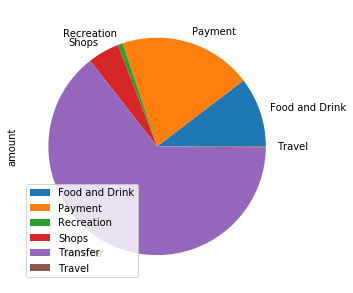

In [64]:
plot = group_df.plot.pie(y='amount', figsize=(5, 5))

### Calculate the expenses per month

In [65]:
# YOUR CODE HERE
selected_df.head()

,date,name,amount,category
0,2019-10-01,Uber 072515 SF**POOL**,6.33,Travel
1,2019-09-28,Tectra Inc,500.00,Food and Drink
2,2019-09-27,AUTOMATIC PAYMENT - THANK,2078.50,Payment
3,2019-09-27,KFC,500.00,Food and Drink
4,2019-09-27,Madison Bicycle Shop,500.00,Shops


In [67]:
selected_df['month'] = selected_df['date'].dt.month
selected_df.head()
group_df2=selected_df.groupby('month').sum()
group_df2.head()

,amount
month,
7,10645.24
8,10645.24
9,10645.24
10,6.33


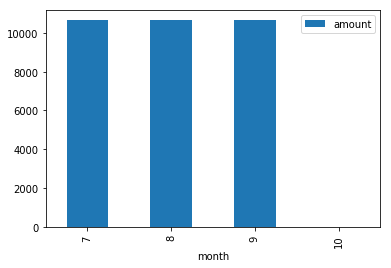

In [68]:
group_df2['amount'].plot.bar(legend='amount')